In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-45.70939844630154 135.6127475517298
-20.410039327283528 17.071007967903995
4.501948889521188 -144.07487593148815
68.49052095254575 12.21383152045189
-73.49541908992042 -122.57429005640631
71.17111804549131 98.81508202546638
-78.68814928904018 -177.92657230407062
51.29417152946999 54.377001487288055
12.894123441865275 -32.824967897111264
84.21223642746307 -149.3210062100343
60.101703670463706 113.39875530784286
-17.46912625643182 42.22169180313787
83.95183805037613 -137.89412074425238
-21.75575592891876 10.713750805205365
-52.32109000400211 -79.2575359885071
-62.29095804232389 167.19356105931814
41.08045806270479 10.805289624329049
61.150870160937984 -93.66134669192357
57.6684371462369 10.711855841121547
-20.73547920122914 -123.14095644491334
-18.15550103471685 -36.24961087586479
76.43056126178155 107.63305434885609
13.11178795240383 -128.28977718804617
-80.9022124492763 100.14565239072931
-13.880087690259543 -8.62421109541637
-77.30776168328988 40.24660488662303
-28.58237970888259 157

20.33128941189652 -136.39977208612325
-21.879662987082597 136.6710317751557
-32.012313022578645 0.29540253217138
66.35847363395598 -97.98031068130476
14.832464555042833 -14.594034232674232
-41.147044335820816 62.2299157951897
72.08068419635313 140.84359246748204
-70.51723343525208 12.695274397618789
-6.027008330581907 78.75784302070298
-40.616205059876314 26.560834539570948
-10.374716641848778 -9.970971480159818
-80.5920722471694 176.3398402460183
57.16775152243571 -152.98976407463408
7.130283590864863 -161.5162263982962
-2.374616860042849 155.46466070355137
26.404843957256332 -28.970053599178385
7.6170808062395565 -66.48105119657266
-29.481858870381224 173.82073016683023
76.4460135888288 106.27020265063089
-47.703554927447655 131.25094728856988
78.08154296368838 49.78424171316337
-47.221606559958126 -51.472513748587346
1.9461335567570188 11.374651630332892
-83.6033657283585 -61.167924280777754
71.48085807354778 167.8922847193225
-17.470062641183063 108.57090177390762
59.19724167536191

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25de2cae59381da235ab07a3b29d36e0


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | okakarara
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | sorland
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | chingirlau
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | peleduy
Processing Record 12 of Set 1 | angoche
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | henties bay
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | siniscola
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | skagen
Processing Record 20 of Set 1 | caravelas
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | jamesto

Processing Record 35 of Set 4 | qaanaaq
Processing Record 36 of Set 4 | galveston
Processing Record 37 of Set 4 | nabire
Processing Record 38 of Set 4 | martapura
Processing Record 39 of Set 4 | alpena
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | san francisco
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | mayo
Processing Record 45 of Set 4 | eluru
Processing Record 46 of Set 4 | mombetsu
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | ayios kirikos
City not found. Skipping...
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | mezhdurechensk
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | tarnobrzeg
Processing Record 3 of Set 5 | bud
Processing Record 4 of Set 5 | anloga
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | hobart
Processing Record 7 of Set 5 | birjand
Processing Record 8 of Set 5 | rena
Processing

Processing Record 26 of Set 8 | semey
Processing Record 27 of Set 8 | fukue
Processing Record 28 of Set 8 | esso
Processing Record 29 of Set 8 | mul
Processing Record 30 of Set 8 | biloela
Processing Record 31 of Set 8 | aswan
Processing Record 32 of Set 8 | camana
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | katangli
Processing Record 35 of Set 8 | jatiroto
Processing Record 36 of Set 8 | bazarnyye mataki
Processing Record 37 of Set 8 | dalton
Processing Record 38 of Set 8 | sola
Processing Record 39 of Set 8 | dudinka
Processing Record 40 of Set 8 | powell river
Processing Record 41 of Set 8 | dagda
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | sommerda
Processing Record 44 of Set 8 | danshui
Processing Record 45 of Set 8 | palu
Processing Record 46 of Set 8 | lipin bor
Processing Record 47 of Set 8 | egvekinot
Processing Record 48 of Set 8 | tyup
Processing Record 49 of Set 8 | balkhash
Processing Re

Processing Record 19 of Set 12 | salinas
Processing Record 20 of Set 12 | we
City not found. Skipping...
Processing Record 21 of Set 12 | seymchan
Processing Record 22 of Set 12 | homer
Processing Record 23 of Set 12 | iglesias
Processing Record 24 of Set 12 | san patricio
Processing Record 25 of Set 12 | bukoba
Processing Record 26 of Set 12 | spirit river
Processing Record 27 of Set 12 | carutapera
Processing Record 28 of Set 12 | mocambique
City not found. Skipping...
Processing Record 29 of Set 12 | nuuk
Processing Record 30 of Set 12 | vanavara
Processing Record 31 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 32 of Set 12 | saint-francois
Processing Record 33 of Set 12 | okhotsk
Processing Record 34 of Set 12 | urucara
Processing Record 35 of Set 12 | robertsport
Processing Record 36 of Set 12 | novyy rogachik
Processing Record 37 of Set 12 | penzance
Processing Record 38 of Set 12 | road town
Processing Record 39 of Set 12 | sabha
Processing Record 4

In [12]:
len(city_data)

553

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.8333,140.7667,64.40,94,75,10.36,AU,2021-03-21 22:04:27
1,Okakarara,-20.5833,17.4333,67.33,85,96,1.86,NA,2021-03-21 22:04:27
2,Atuona,-9.8000,-139.0333,80.02,77,3,12.71,PF,2021-03-21 22:04:28
3,Sorland,67.6670,12.6934,24.80,100,75,2.30,NO,2021-03-21 22:04:28
4,Rikitea,-23.1203,-134.9692,80.42,69,12,7.40,PF,2021-03-21 22:04:28
5,Khatanga,71.9667,102.5000,-23.71,77,0,8.14,RU,2021-03-21 22:04:28
6,Vaini,-21.2000,-175.2000,82.40,83,75,4.61,TO,2021-03-21 22:04:29
7,Chingirlau,51.0950,54.0814,18.72,95,91,6.04,KZ,2021-03-21 22:04:29
8,Sao Filipe,14.8961,-24.4956,71.44,70,99,9.69,CV,2021-03-21 22:04:29
9,Barrow,71.2906,-156.7887,-9.40,70,1,14.97,US,2021-03-21 22:04:30


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Gambier,AU,2021-03-21 22:04:27,-37.8333,140.7667,64.40,94,75,10.36
1,Okakarara,NA,2021-03-21 22:04:27,-20.5833,17.4333,67.33,85,96,1.86
2,Atuona,PF,2021-03-21 22:04:28,-9.8000,-139.0333,80.02,77,3,12.71
3,Sorland,NO,2021-03-21 22:04:28,67.6670,12.6934,24.80,100,75,2.30
4,Rikitea,PF,2021-03-21 22:04:28,-23.1203,-134.9692,80.42,69,12,7.40
...,...,...,...,...,...,...,...,...,...
548,Conceicao Da Barra,BR,2021-03-21 22:07:03,-18.5933,-39.7322,75.72,85,32,3.89
549,La Ronge,CA,2021-03-21 22:07:03,55.1001,-105.2842,23.00,50,63,13.80
550,Jerome,US,2021-03-21 22:07:03,42.7241,-114.5186,46.40,36,90,14.97
551,Sao Felix Do Xingu,BR,2021-03-21 22:07:03,-6.6447,-51.9950,74.57,95,82,1.19


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

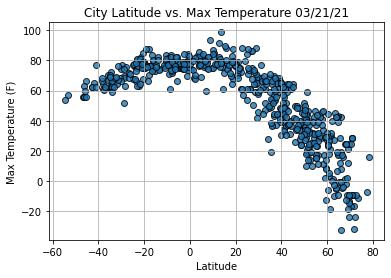

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

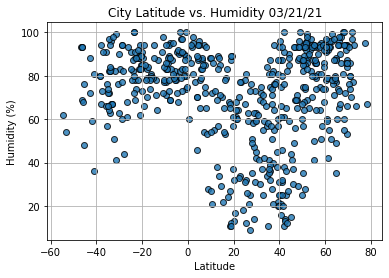

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

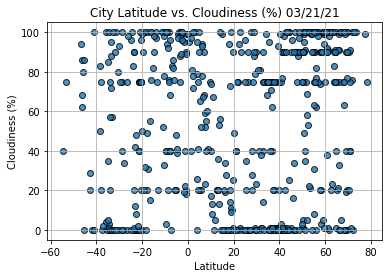

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

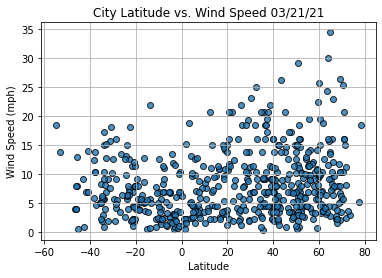

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [51]:
# Using the loc method to get a specific row from a current dataframe
index13 = city_data_df.loc[13]
index13

City                  Henties Bay
Country                        NA
Date          2021-03-21 22:04:31
Lat                       -22.116
Lng                       14.2845
Max Temp                       63
Humidity                       88
Cloudiness                      0
Wind Speed                   1.99
Name: 13, dtype: object

In [52]:
# Filtering dataframe based on a value of a row
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
548    False
549     True
550     True
551    False
552     True
Name: Lat, Length: 553, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Sorland,NO,2021-03-21 22:04:28,67.6670,12.6934,24.80,100,75,2.30
5,Khatanga,RU,2021-03-21 22:04:28,71.9667,102.5000,-23.71,77,0,8.14
7,Chingirlau,KZ,2021-03-21 22:04:29,51.0950,54.0814,18.72,95,91,6.04
8,Sao Filipe,CV,2021-03-21 22:04:29,14.8961,-24.4956,71.44,70,99,9.69
9,Barrow,US,2021-03-21 22:04:30,71.2906,-156.7887,-9.40,70,1,14.97


In [54]:
# Create northern and souther hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

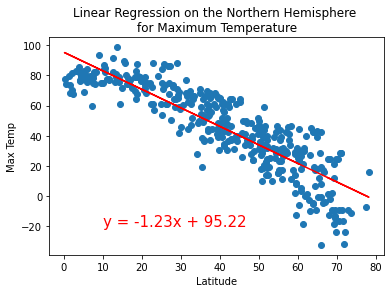

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", "Max Temp",(10,-20))

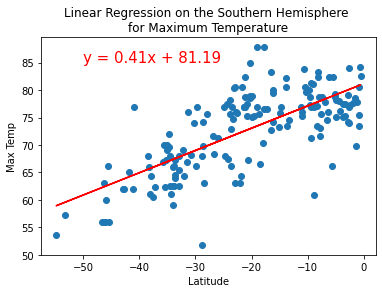

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50, 85))

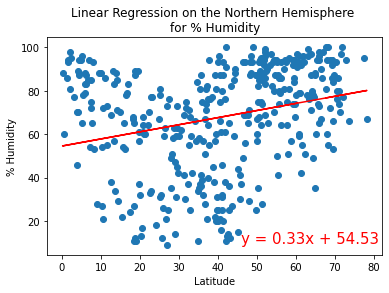

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(46,10))

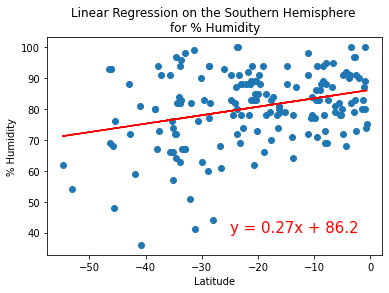

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-25,40))

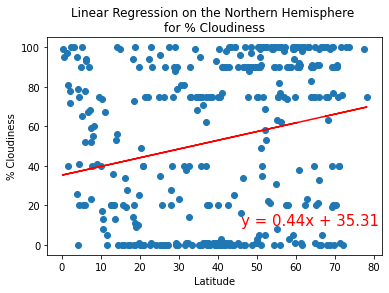

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(46,10))

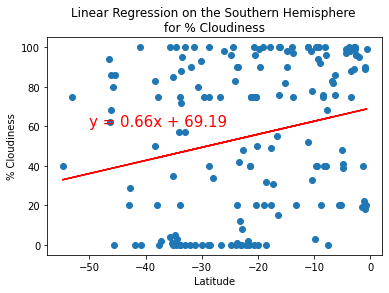

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

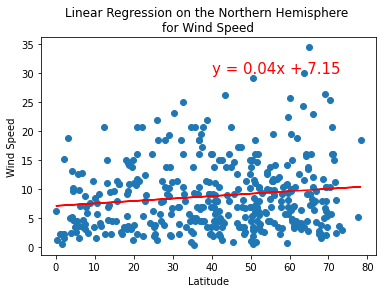

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,30))

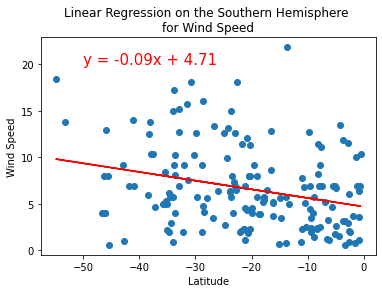

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))